In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [127]:
df = pd.read_csv("/content/Data-cleaning-for-beginners-using-pandas.csv")


In [128]:
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


1. Missing Values:
Question: Are there any missing values in the dataset, and if so, how should they be handled for each indicator?


Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


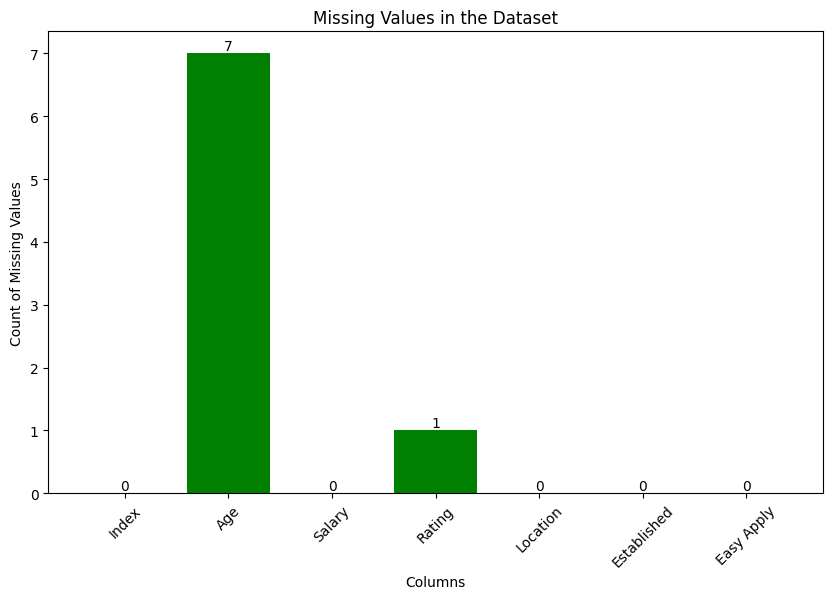

In [129]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

# Create a bar chart for missing values with labels on top of bars
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_values.index, missing_values, color='green')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Missing Values in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()

2. Data Types:
Question: What are the data types of each indicator, and do they align with their expected types (e.g., numerical, categorical)?


In [130]:
data_types = df.dtypes

# Print the data types of each column
print("Data types of each column:")
print(data_types)



Data types of each column:
Index            int64
Age            float64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object


3. Outliers:
Question: Identify potential outliers in numerical indicators (e.g., Age, Salary, Rating). Should outliers be removed or adjusted?


In [131]:
avg_age = df['Age'].mean()
avg_age

39.04545454545455

In [132]:
# fill the missing values with mean
df['Age'] = df.Age.fillna(avg_age)
df['Age'] = df.Age.round(decimals=1)

In [133]:
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,39.0,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


<Axes: >

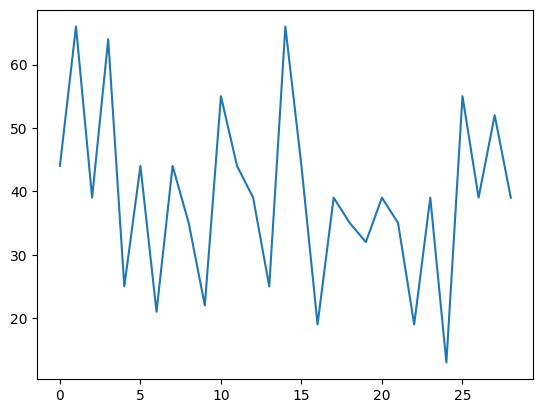

In [134]:
# Calculate the IQR for 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
potential_outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
df['Age'].plot(kind='line')

4. Salary Formatting:
Question: Examine the format of the Salary column. Does it require any formatting or standardization for consistent analysis?


In [135]:
print(df['Salary'].head())

0    $44k-$99k
1    $55k-$66k
2    $77k-$89k
3    $44k-$99k
4    $44k-$99k
Name: Salary, dtype: object


In [136]:
# Clean and format the Salary column
df['Salary'] = df['Salary'].str.replace('[\$,k]', '', regex=True)  # Remove $ and k
df[['Min Salary', 'Max Salary']] = df['Salary'].str.split('-', expand=True)  # Split into min and max values
df['Min Salary'] = df['Min Salary'].astype(int)  # Convert to integer
df['Max Salary'] = df['Max Salary'].astype(int)  # Convert to integer

# Calculate average salary and add it as a new column
df['Average Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

# Display the cleaned and formatted dataset
print("\nCleaned and formatted dataset:")
print(df[['Salary', 'Min Salary', 'Max Salary', 'Average Salary']].head())


Cleaned and formatted dataset:
  Salary  Min Salary  Max Salary  Average Salary
0  44-99          44          99            71.5
1  55-66          55          66            60.5
2  77-89          77          89            83.0
3  44-99          44          99            71.5
4  44-99          44          99            71.5


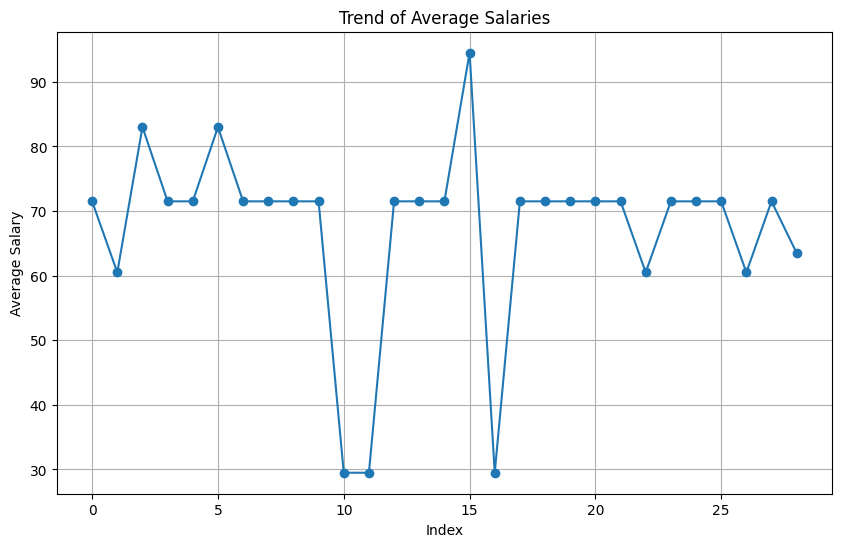

In [137]:
# Visualize the distribution of salaries using a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Average Salary'], marker='o', linestyle='-')
plt.title('Trend of Average Salaries')
plt.xlabel('Index')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

5. Location Standardization:
Question: Check the consistency of location entries. Do they need standardization, and how can this be achieved?


In [138]:
print(df['Location'].head(10))

0         India,In
1      New York,Ny
2      New York,Ny
3         India In
4    Australia Aus
5         India,In
6      New York,Ny
7    Australia Aus
8      New York,Ny
9         India,In
Name: Location, dtype: object


In [139]:
# Define a function for standardizing location entries
def standardize_location(location):
    mapping = {
        'India,In': 'India',
        'India In': 'India',
        'New York,Ny': 'New York',
        'Australia Aus': 'Australia'
        # Add more entries as needed for other variations
    }
    return mapping.get(location, location)

# Apply the standardization function to the 'Location' column
df['Standardized Location'] = df['Location'].apply(standardize_location)

# Display the standardized location data
print(df[['Location', 'Standardized Location']].head(10))

        Location Standardized Location
0       India,In                 India
1    New York,Ny              New York
2    New York,Ny              New York
3       India In                 India
4  Australia Aus             Australia
5       India,In                 India
6    New York,Ny              New York
7  Australia Aus             Australia
8    New York,Ny              New York
9       India,In                 India


6. Established Column:
Question: Explore the Established column. Are there any inconsistencies or anomalies that need to be addressed?


In [140]:


# Replace invalid values (-1) with NaN (missing value)
df['Established'] = df['Established'].replace(-1, np.nan)

# Display the cleaned 'Established' column
print(df['Established'])


0     1999.0
1     2002.0
2        NaN
3     1988.0
4     2002.0
5     1999.0
6        NaN
7        NaN
8        NaN
9        NaN
10    2008.0
11    2009.0
12    1999.0
13    2019.0
14    2020.0
15    1999.0
16    1984.0
17    1943.0
18    1954.0
19    1955.0
20    1944.0
21    1946.0
22    1988.0
23    1999.0
24    1987.0
25    1980.0
26    1934.0
27    1935.0
28    1932.0
Name: Established, dtype: float64


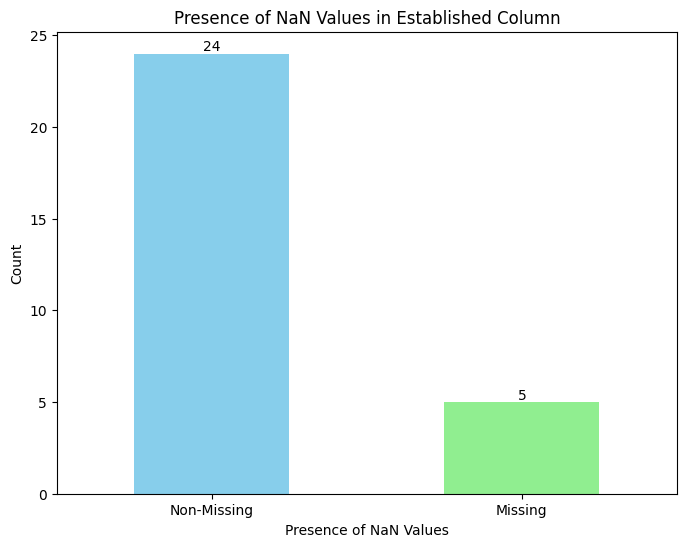

In [141]:
# Count the occurrences of missing and non-missing values
value_counts = df['Established'].isna().value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = value_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Presence of NaN Values in Established Column')
plt.xlabel('Presence of NaN Values')
plt.ylabel('Count')

# Add labels to the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom')

plt.xticks([0, 1], ['Non-Missing', 'Missing'], rotation=0)
plt.show()



7. Easy Apply Indicator:
Question: Analyze the Easy Apply column. Does it contain boolean values or need transformation for better analysis?


In [142]:
# Define the replacement dictionary
replacement_dict = {'TRUE': True, '-1': False}

# Replace values in the 'Easy Apply' column using the replace method
df['Easy Apply'] = df['Easy Apply'].replace(replacement_dict)

# Convert the 'Easy Apply' column to boolean type
df['Easy Apply'] = df['Easy Apply'].astype(bool)

# Display the transformed 'Easy Apply' column
print(df['Easy Apply'])


0      True
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15    False
16    False
17     True
18     True
19     True
20     True
21    False
22     True
23     True
24    False
25     True
26     True
27    False
28    False
Name: Easy Apply, dtype: bool


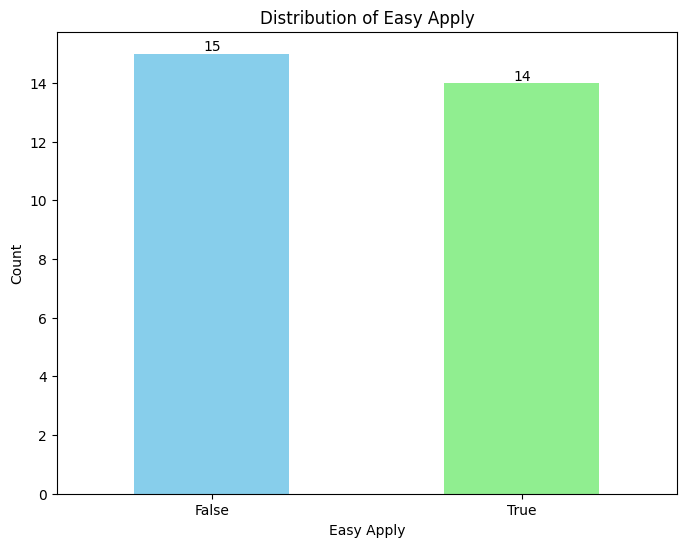

In [143]:
# Count the occurrences of True and False
value_counts = df['Easy Apply'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = value_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Easy Apply')
plt.xlabel('Easy Apply')
plt.ylabel('Count')
plt.xticks([1, 0], ['True', 'False'], rotation=0)

# Add labels to the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom')

plt.show()


8. Rating Range:
Question: Investigate the range of values in the Rating column. Does it fall within expected rating scales, and how should outliers be treated?


count    21.000000
mean      4.895238
std       1.686557
min       1.400000
25%       3.500000
50%       5.300000
75%       5.700000
max       7.800000
Name: Rating, dtype: float64


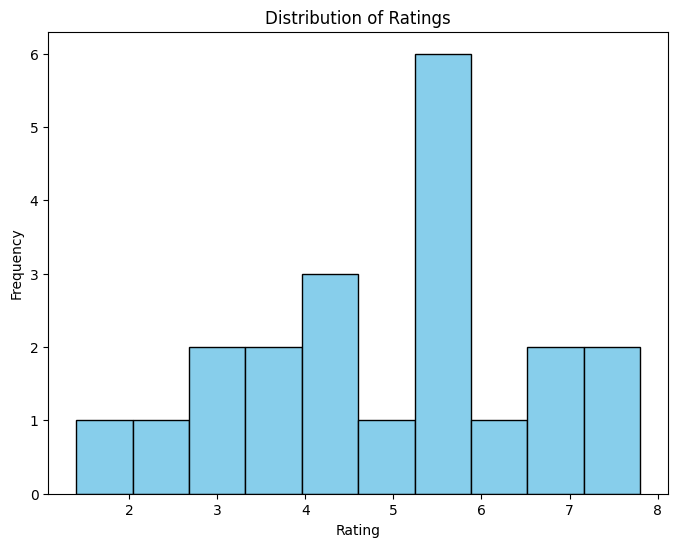

In [144]:
# Replace -1, 0, None, and empty strings with NaN in the 'Rating' column
replace_values = [-1, 0, None, '']
df['Rating'] = df['Rating'].apply(lambda x: np.nan if x in replace_values else x)

# Convert 'Rating' column to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Investigate the range of values
print(df['Rating'].describe())

# Visualize the distribution of ratings using a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


9. Age Distribution:
Question: Check the distribution of values in the Age column. Are there any unusual entries, and how might they impact analysis?


count    29.000000
mean     39.034483
std      13.973145
min      13.000000
25%      32.000000
50%      39.000000
75%      44.000000
max      66.000000
Name: Age, dtype: float64


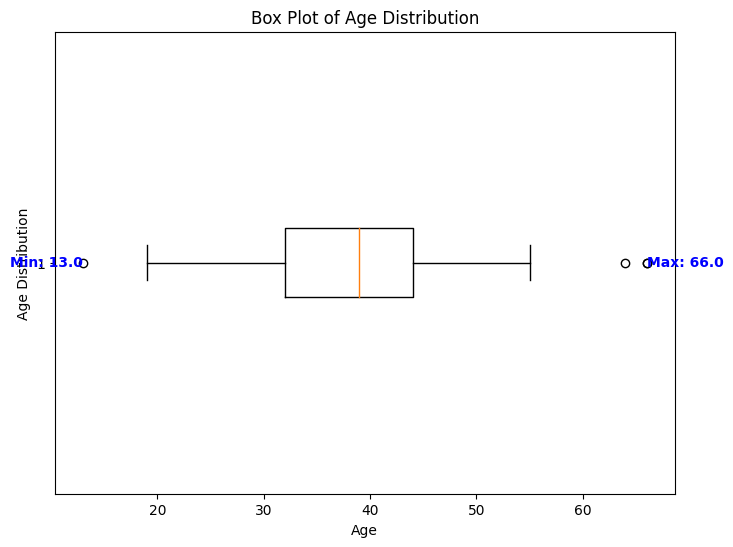

In [145]:

# Check descriptive statistics of the 'Age' column
print(df['Age'].describe())

# Create a box plot for the 'Age' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Age Distribution')


# Add text annotations for minimum and maximum values
min_value = df['Age'].min()
max_value = df['Age'].max()
plt.text(min_value, 1, f'Min: {min_value}', ha='right', va='center', color='blue', fontweight='bold')
plt.text(max_value, 1, f'Max: {max_value}', ha='left', va='center', color='blue', fontweight='bold')


plt.show()

10. Handling Special Characters:
Question: Examine all text-based columns (e.g., Location). Are there special characters or inconsistencies that need cleaning?


In [146]:
# Assuming df is your DataFrame containing text-based columns like 'Location'

# List of text-based columns to examine
text_columns = ['Location']  # Add all relevant text-based column names here

# Define special characters to check for
special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', '|', '\\', ';', ':', '\'', '"', ',', '<', '.', '>', '/', '?', '~', '`']

# Iterate through each text-based column
for column in text_columns:
    # Check for special characters in each cell of the column
    for index, value in df[column].items():
        if any(char in special_characters for char in str(value)):
            print(f"Column '{column}' at index {index} contains special characters that may need cleaning: {value}")


Column 'Location' at index 0 contains special characters that may need cleaning: India,In
Column 'Location' at index 1 contains special characters that may need cleaning: New York,Ny
Column 'Location' at index 2 contains special characters that may need cleaning: New York,Ny
Column 'Location' at index 5 contains special characters that may need cleaning: India,In
Column 'Location' at index 6 contains special characters that may need cleaning: New York,Ny
Column 'Location' at index 8 contains special characters that may need cleaning: New York,Ny
Column 'Location' at index 9 contains special characters that may need cleaning: India,In
Column 'Location' at index 10 contains special characters that may need cleaning: India,In
Column 'Location' at index 11 contains special characters that may need cleaning: India,In
Column 'Location' at index 12 contains special characters that may need cleaning: India,In
Column 'Location' at index 16 contains special characters that may need cleaning: Ind

In [147]:
# Assuming df is your DataFrame containing the 'Location' column

# Clean the 'Location' column by removing special characters
df['Location'] = df['Location'].str.replace(r'[^a-zA-Z0-9\s]', '')

# Display the cleaned 'Location' column
print(df['Location'])


0           IndiaIn
1        New YorkNy
2        New YorkNy
3          India In
4     Australia Aus
5           IndiaIn
6        New YorkNy
7     Australia Aus
8        New YorkNy
9           IndiaIn
10          IndiaIn
11          IndiaIn
12          IndiaIn
13    Australia Aus
14    Australia Aus
15    Australia Aus
16          IndiaIn
17       New YorkNy
18       New YorkNy
19       New YorkNy
20       New YorkNy
21       New YorkNy
22       New YorkNy
23       New YorkNy
24       New YorkNy
25    Australia Aus
26          IndiaIn
27          IndiaIn
28    Australia Aus
Name: Location, dtype: object


<ipython-input-147-cf8ba48a69a8>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location'] = df['Location'].str.replace(r'[^a-zA-Z0-9\s]', '')


11. Data Integrity:
Question: Ensure data integrity by cross-referencing entries. For instance, does the Established column align with the Age column?


In [148]:
# Assuming df is your DataFrame containing the 'Established' and 'Age' columns

# Check for data integrity by cross-referencing entries in the 'Established' and 'Age' columns
for index, row in df.iterrows():
    established_year = row['Established']
    company_age = 2023 - established_year  # Assuming the current year is 2023

    if company_age != row['Age']:
        print(f"Data integrity issue at index {index}: Established year ({established_year}) does not align with Age ({row['Age']})")


Data integrity issue at index 0: Established year (1999.0) does not align with Age (44.0)
Data integrity issue at index 1: Established year (2002.0) does not align with Age (66.0)
Data integrity issue at index 2: Established year (nan) does not align with Age (39.0)
Data integrity issue at index 3: Established year (1988.0) does not align with Age (64.0)
Data integrity issue at index 4: Established year (2002.0) does not align with Age (25.0)
Data integrity issue at index 5: Established year (1999.0) does not align with Age (44.0)
Data integrity issue at index 6: Established year (nan) does not align with Age (21.0)
Data integrity issue at index 7: Established year (nan) does not align with Age (44.0)
Data integrity issue at index 8: Established year (nan) does not align with Age (35.0)
Data integrity issue at index 9: Established year (nan) does not align with Age (22.0)
Data integrity issue at index 10: Established year (2008.0) does not align with Age (55.0)
Data integrity issue at 


12. Easy Apply Transformation:
Question: If the Easy Apply column contains non-boolean values, how can it be transformed into a usable format?


In [149]:
print(df['Easy Apply'])

0      True
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15    False
16    False
17     True
18     True
19     True
20     True
21    False
22     True
23     True
24    False
25     True
26     True
27    False
28    False
Name: Easy Apply, dtype: bool


13. Location Accuracy:
Question: Assess the accuracy of location entries. Are there misspelled or ambiguous locations that require correction?


In [150]:
# Step 1: Check unique values in the 'Location' column
unique_locations = df['Location'].unique()
print(unique_locations)

# Step 2: Standardize format if needed
df['Location'] = df['Location'].str.replace(' ', '')  # Remove spaces within locations

['IndiaIn' 'New YorkNy' 'India In' 'Australia Aus']


In [151]:
# Step 3: Identify and correct ambiguous locations
# Display unique values in the 'Location' column for manual inspection
unique_locations = df['Location'].unique()

# Print the unique values
for location in unique_locations:
    print(location)


IndiaIn
NewYorkNy
AustraliaAus


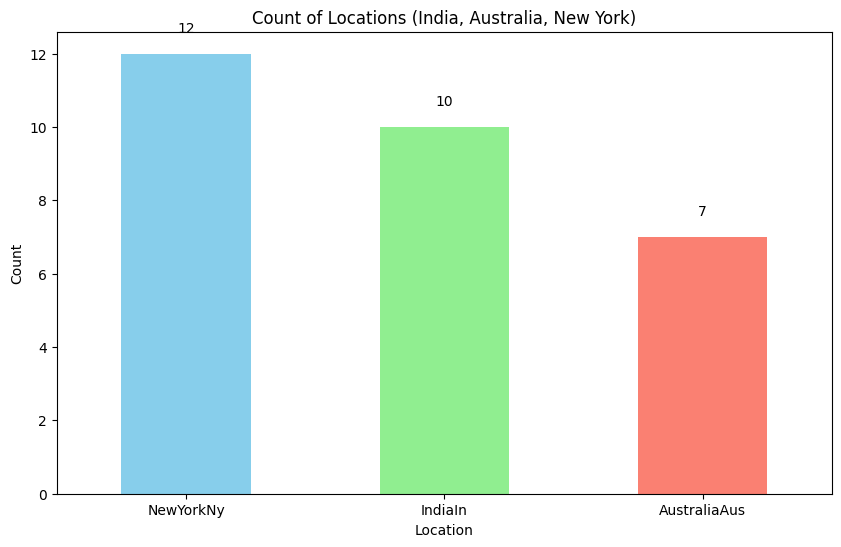

In [152]:
# Count the occurrences of each location
location_counts = df['Location'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Count of Locations (India, Australia, New York)')
plt.xlabel('Location')
plt.ylabel('Count')

# Add labels to the bars
for i, count in enumerate(location_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

14. Handling Categorical Data:
Question: For categorical indicators, consider encoding or transforming them into a format suitable for analysis.


In [153]:

from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame containing the dataset
# Create a new DataFrame with the one-hot encoded 'Location' column
location_df = pd.get_dummies(df['Location'], prefix='Location')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, location_df], axis=1)

# Drop the original 'Location' column if needed
df_encoded.drop('Location', axis=1, inplace=True)

# Display the resulting DataFrame
print(df_encoded.head())


   Index   Age Salary  Rating  Established  Easy Apply  Min Salary  \
0      0  44.0  44-99     5.4       1999.0        True          44   
1      1  66.0  55-66     3.5       2002.0        True          55   
2      2  39.0  77-89     NaN          NaN       False          77   
3      3  64.0  44-99     4.4       1988.0       False          44   
4      4  25.0  44-99     6.4       2002.0       False          44   

   Max Salary  Average Salary Standardized Location  Location_AustraliaAus  \
0          99            71.5                 India                      0   
1          66            60.5              New York                      0   
2          89            83.0              New York                      0   
3          99            71.5                 India                      0   
4          99            71.5             Australia                      1   

   Location_IndiaIn  Location_NewYorkNy  
0                 1                   0  
1                 0       

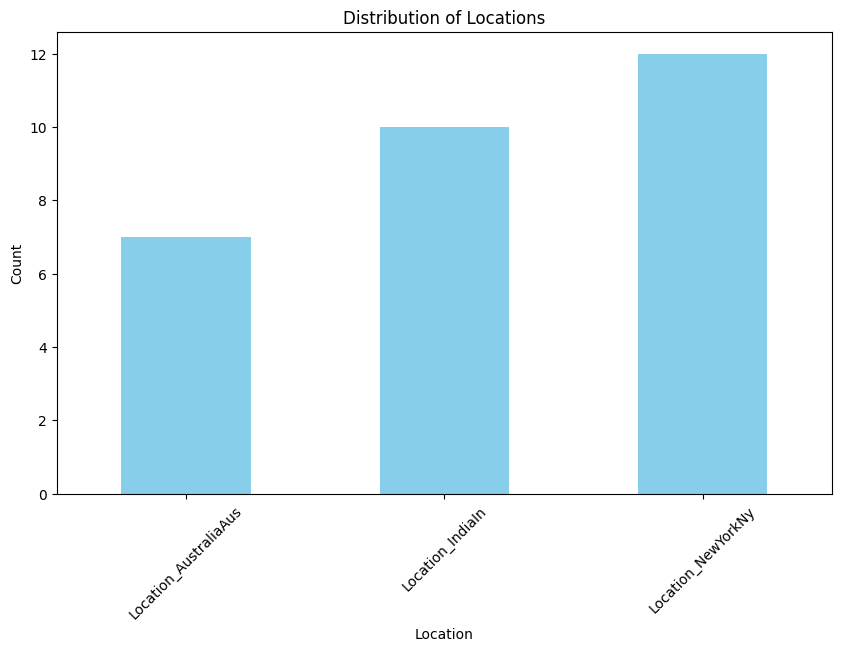

In [154]:
location_counts = df_encoded.filter(regex='^Location_').sum()

# Create a bar plot of the location counts
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

15. Consistent Rating Scale:
Question: Ensure a consistent rating scale in the Rating column. Should it be normalized or adjusted for uniform analysis?


In [155]:
# Replace invalid values (-1) with NaN (missing value)
df['Rating'] = df['Rating'].replace(-1, pd.NA)

# Normalize the ratings to a scale of 0 to 5
min_rating = df['Rating'].min()
max_rating = df['Rating'].max()
df['Normalized_Rating'] = ((df['Rating'] - min_rating) / (max_rating - min_rating)) * 5

# Display the transformed DataFrame
print(df)

    Index   Age  Salary  Rating      Location  Established  Easy Apply  \
0       0  44.0   44-99     5.4       IndiaIn       1999.0        True   
1       1  66.0   55-66     3.5     NewYorkNy       2002.0        True   
2       2  39.0   77-89     NaN     NewYorkNy          NaN       False   
3       3  64.0   44-99     4.4       IndiaIn       1988.0       False   
4       4  25.0   44-99     6.4  AustraliaAus       2002.0       False   
5       5  44.0   77-89     1.4       IndiaIn       1999.0        True   
6       6  21.0   44-99     NaN     NewYorkNy          NaN       False   
7       7  44.0   44-99     NaN  AustraliaAus          NaN       False   
8       8  35.0   44-99     5.4     NewYorkNy          NaN       False   
9       9  22.0   44-99     7.7       IndiaIn          NaN        True   
10     10  55.0   10-49     5.4       IndiaIn       2008.0        True   
11     11  44.0   10-49     6.7       IndiaIn       2009.0       False   
12     12  39.0   44-99     NaN       

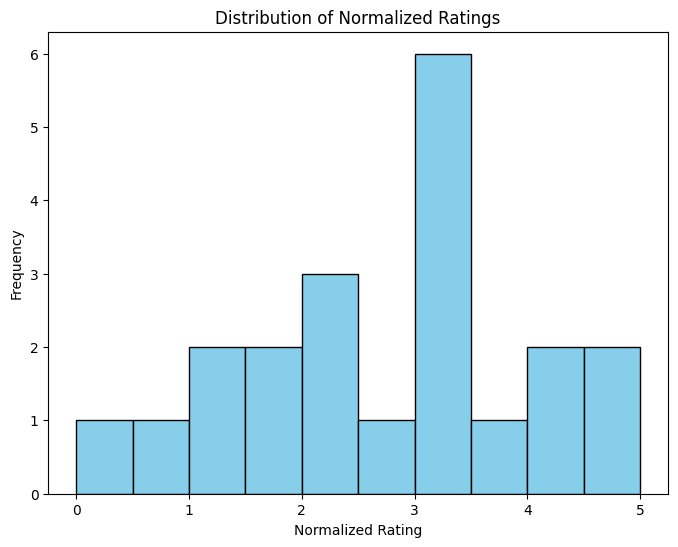

In [156]:
# Create a histogram of the normalized ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Normalized_Rating'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Normalized Ratings')
plt.xlabel('Normalized Rating')
plt.ylabel('Frequency')
plt.show()